In [1]:
!pip install split-folders

In [ ]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/skripsiku/Data/data_mentah'

SBW_B  SBW_K  SBW_SB  SBW_SK


In [ ]:
import splitfolders
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from rembg import remove

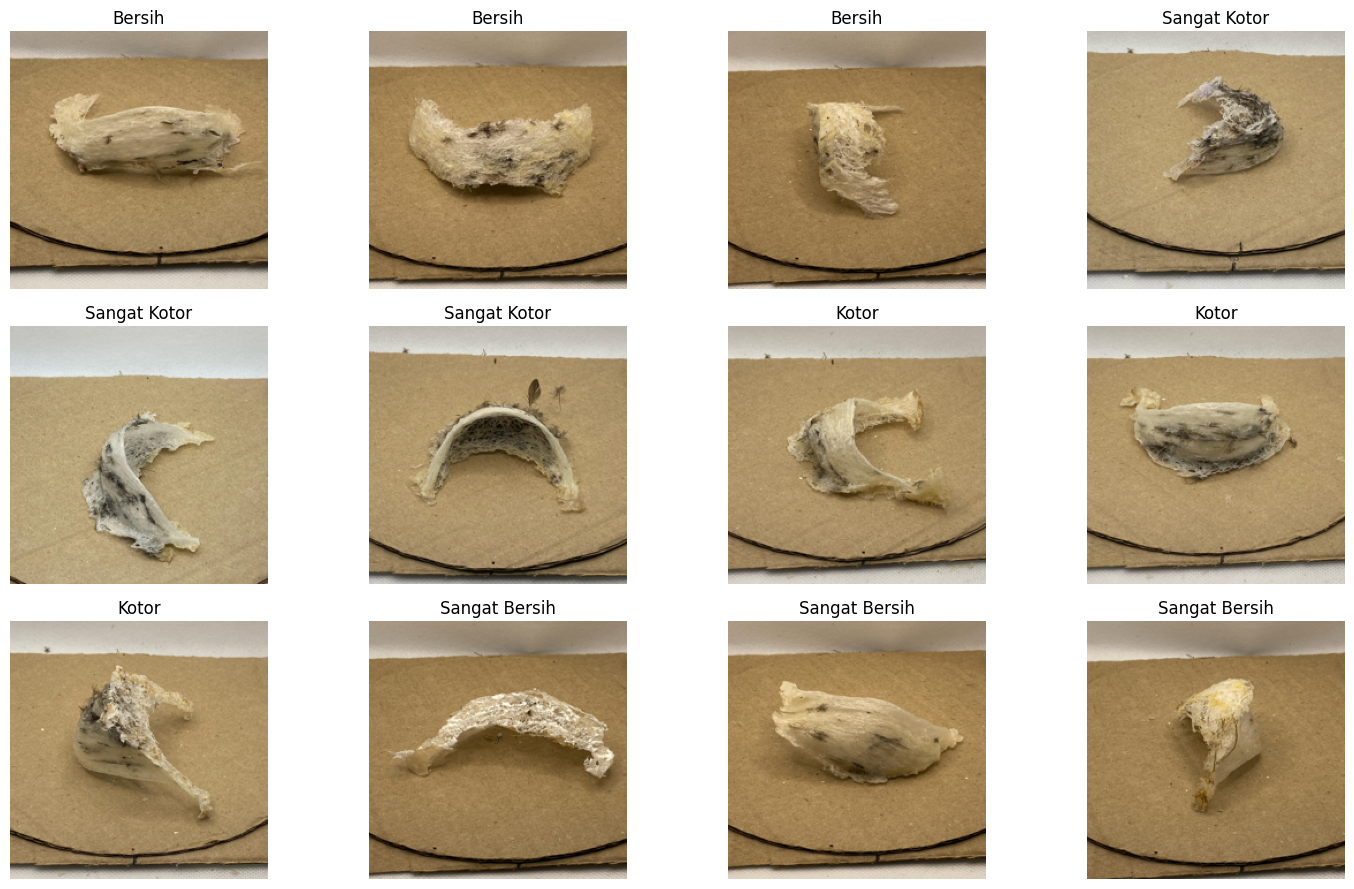

In [ ]:
data_dir = '/content/drive/My Drive/skripsiku/Data/data_mentah'
label_map = {
    'SBW_K': 'Kotor',
    'SBW_B': 'Bersih',
    'SBW_SK': 'Sangat Kotor',
    'SBW_SB': 'Sangat Bersih'
}

# Parameter
num_images = 12
target_size = (224, 224)

# Ambil semua gambar dari semua folder
image_paths = []
for class_folder in os.listdir(data_dir):
    full_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(full_path):
        images = [os.path.join(full_path, f) for f in os.listdir(full_path)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        selected = random.sample(images, min(len(images), num_images // 4))
        image_paths.extend(selected)

# Tambah jika kurang dari num_images
if len(image_paths) < num_images:
    more_needed = num_images - len(image_paths)
    image_paths += random.sample(image_paths, more_needed)

# Tampilkan
cols = 4
rows = (num_images + cols - 1) // cols
plt.figure(figsize=(15, rows * 3))

for i, img_path in enumerate(image_paths[:num_images]):
    img = Image.open(img_path).resize(target_size)
    label = os.path.basename(os.path.dirname(img_path))
    label = label_map.get(label, label)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(np.array(img) / 255.0)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Direktori sumber
data_dir = '/content/drive/My Drive/skripsiku/Data/data_mentah'

# Direktori tujuan hasil background removal
output_dir = '/content/drive/My Drive/skripsiku/Data/raw_no_bg'

def remove_bg_from_directory(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    for class_folder in os.listdir(input_dir):
        class_input_path = os.path.join(input_dir, class_folder)
        class_output_path = os.path.join(output_dir, class_folder)

        if not os.path.isdir(class_input_path):
            continue  # skip file non-folder

        os.makedirs(class_output_path, exist_ok=True)

        for filename in os.listdir(class_input_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                input_path = os.path.join(class_input_path, filename)
                output_filename = os.path.splitext(filename)[0] + '.png'
                output_path = os.path.join(class_output_path, output_filename)

                try:
                    with open(input_path, 'rb') as inp:
                        input_image = inp.read()
                    output_image = remove(input_image)
                    with open(output_path, 'wb') as outp:
                        outp.write(output_image)
                    print(f"Sukses: {output_filename}")
                except Exception as e:
                    print(f"Gagal proses {filename}: {e}")

# Jalankan
remove_bg_from_directory(data_dir, output_dir)

print("Selesai hapus background semua gambar.")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 172GB/s]


Sukses: B_0173.png
Sukses: B_0152.png
Sukses: B_0181.png
Sukses: B_0155.png
Sukses: B_0190.png
Sukses: B_0163.png
Sukses: B_0171.png
Sukses: B_0166.png
Sukses: B_0187.png
Sukses: B_0153.png
Sukses: B_0188.png
Sukses: B_0168.png
Sukses: B_0183.png
Sukses: B_0180.png
Sukses: B_0157.png
Sukses: B_0164.png
Sukses: B_0184.png
Sukses: B_0196.png
Sukses: B_0175.png
Sukses: B_0167.png
Sukses: B_0194.png
Sukses: B_0200.png
Sukses: B_0178.png
Sukses: B_0182.png
Sukses: B_0158.png
Sukses: B_0176.png
Sukses: B_0199.png
Sukses: B_0177.png
Sukses: B_0197.png
Sukses: B_0159.png
Sukses: B_0170.png
Sukses: B_0156.png
Sukses: B_0174.png
Sukses: B_0172.png
Sukses: B_0185.png
Sukses: B_0186.png
Sukses: B_0189.png
Sukses: B_0165.png
Sukses: B_0169.png
Sukses: B_0179.png
Sukses: B_0198.png
Sukses: B_0161.png
Sukses: B_0193.png
Sukses: B_0192.png
Sukses: B_0195.png
Sukses: B_0162.png
Sukses: B_0160.png
Sukses: B_0191.png
Sukses: B_0154.png
Sukses: B_0118.png
Sukses: B_0132.png
Sukses: B_0148.png
Sukses: B_01

In [ ]:
input_folder = '/content/drive/My Drive/skripsiku/Data/raw_no_bg'
output_folder = '/content/drive/MyDrive/skripsiku/Data/split_data'

In [ ]:
# Bagi data dengan rasio: 70% train, 20% val, 10% test
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(.7, .2, .1),
    move=False)

Copying files: 800 files [01:02, 12.88 files/s]


In [ ]:
base_path = '/content/drive/My Drive/skripsiku/Data/split_data/'  # ganti sesuai path kamu
sets = ['train', 'val', 'test']

print("Jumlah data per kategori:")
for category in os.listdir(os.path.join(base_path, 'train')):
    print(f"\nKategori: {category}")
    for s in sets:
        folder = os.path.join(base_path, s, category)
        count = len(os.listdir(folder)) if os.path.exists(folder) else 0
        print(f"  {s:<5}: {count} file")

Jumlah data per kategori:

Kategori: SBW_B
  train: 140 file
  val  : 40 file
  test : 20 file

Kategori: SBW_SK
  train: 140 file
  val  : 40 file
  test : 20 file

Kategori: SBW_K
  train: 140 file
  val  : 40 file
  test : 20 file

Kategori: SBW_SB
  train: 140 file
  val  : 40 file
  test : 20 file


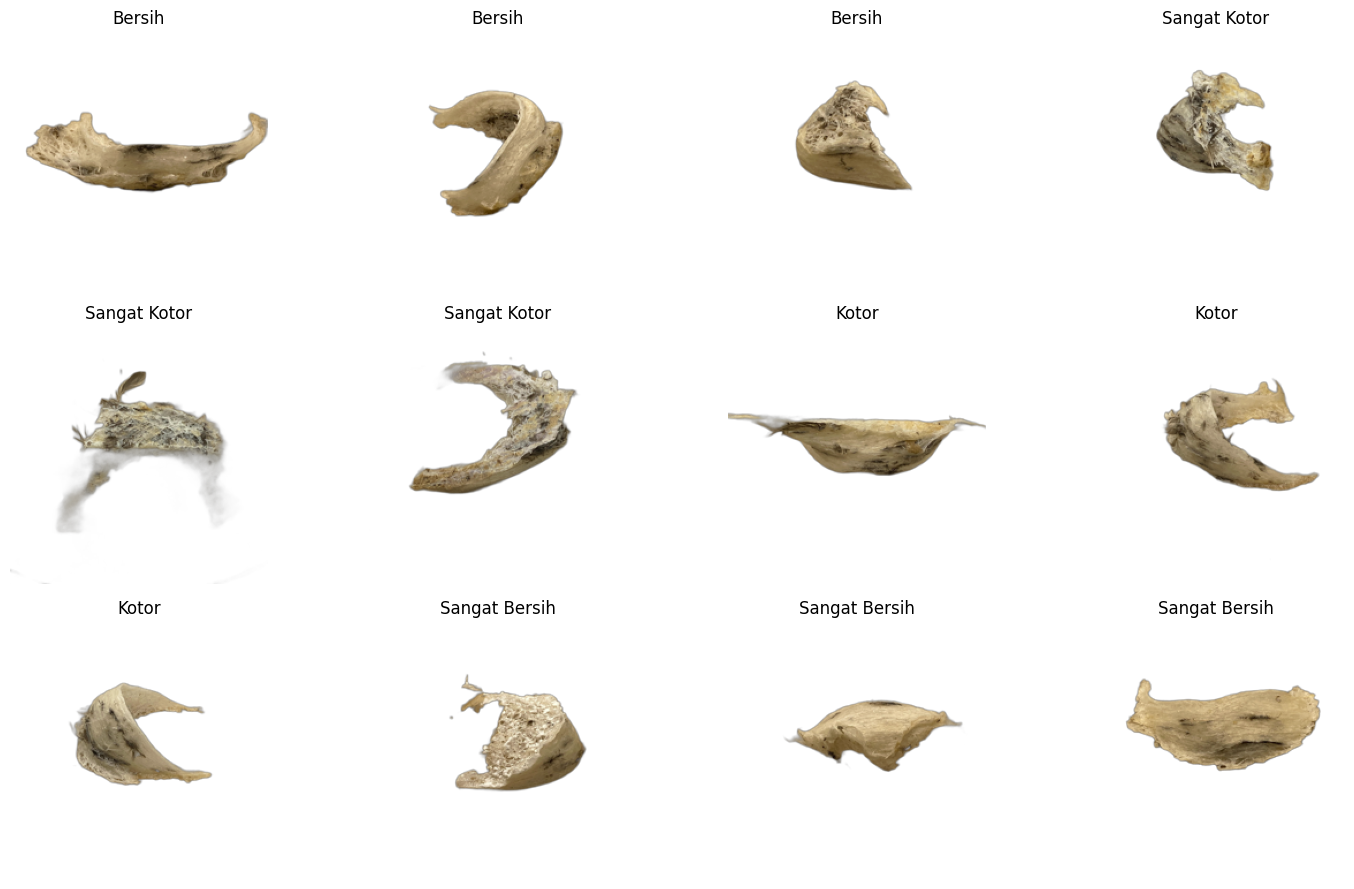

In [ ]:
data_dir = '/content/drive/My Drive/skripsiku/Data/split_data/train'
label_map = {
    'SBW_K': 'Kotor',
    'SBW_B': 'Bersih',
    'SBW_SK': 'Sangat Kotor',
    'SBW_SB': 'Sangat Bersih'
}

# Parameter
num_images = 12
target_size = (224, 224)

# Ambil semua gambar dari semua folder
image_paths = []
for class_folder in os.listdir(data_dir):
    full_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(full_path):
        images = [os.path.join(full_path, f) for f in os.listdir(full_path)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        selected = random.sample(images, min(len(images), num_images // 4))
        image_paths.extend(selected)

# Tambah jika kurang dari num_images
if len(image_paths) < num_images:
    more_needed = num_images - len(image_paths)
    image_paths += random.sample(image_paths, more_needed)

# Tampilkan
cols = 4
rows = (num_images + cols - 1) // cols
plt.figure(figsize=(15, rows * 3))

for i, img_path in enumerate(image_paths[:num_images]):
    img = Image.open(img_path).resize(target_size)
    label = os.path.basename(os.path.dirname(img_path))
    label = label_map.get(label, label)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(np.array(img) / 255.0)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()